In [ ]:
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

In [ ]:
 # !pip install --upgrade tensorflow

In [ ]:
import pandas as pd
import numpy as np
from keras.utils import np_utils

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('gdrive/MyDrive/fer2013.csv')

In [ ]:
data.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
#for index, row in data.iterrows():
#    k = row['pixels'].split(" ")
#    if row['Usage'] == 'Training':
#        X_train.append(np.array(k))
#        y_train.append(row['emotion'])
#    elif row['Usage'] == 'PublicTest':
#        X_test.append(np.array(k))
#        y_test.append(row['emotion'])

In [ ]:
x = np.array([[int(pix) for pix in image.split()] for image in data.pixels ]).reshape(-1, 48, 48, 1)
y = data.emotion.copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41, stratify=y)

In [ ]:
#X_train = np.array(X_train)
#y_train = np.array(y_train)
#X_test = np.array(X_test)
#y_test = np.array(y_test)

#X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
#X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train = np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)

In [ ]:
import cv2
image = cv2.imread("Ben_Afflec.jpg")

In [ ]:
image.shape

In [ ]:
num_features = 48
num_labels = 7 

In [ ]:
X_train.dtype

dtype('int64')

## Модель

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.regularizers import l2


import cv2
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', 
                 input_shape=(48, 48, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

In [ ]:
%%time
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

CPU times: user 16.6 ms, sys: 0 ns, total: 16.6 ms
Wall time: 22.3 ms


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 48)        480       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 48)        20784     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 48)        192       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 96)        41568     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 96)        3

In [ ]:
%%time
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/100
785/785 [==============================] - 16s 20ms/step - loss: 2.0022 - accuracy: 0.2143 - val_loss: 1.8284 - val_accuracy: 0.2508
Epoch 2/100
785/785 [==============================] - 15s 20ms/step - loss: 1.8380 - accuracy: 0.2453 - val_loss: 1.8116 - val_accuracy: 0.2505
Epoch 3/100
785/785 [==============================] - 16s 20ms/step - loss: 1.8090 - accuracy: 0.2581 - val_loss: 1.8020 - val_accuracy: 0.2565
Epoch 4/100
785/785 [==============================] - 16s 20ms/step - loss: 1.7397 - accuracy: 0.2963 - val_loss: 1.7221 - val_accuracy: 0.2837
Epoch 5/100
785/785 [==============================] - 16s 20ms/step - loss: 1.6576 - accuracy: 0.3377 - val_loss: 1.5692 - val_accuracy: 0.3634
Epoch 6/100
785/785 [==============================] - 16s 20ms/step - loss: 1.5810 - accuracy: 0.3718 - val_loss: 1.4973 - val_accuracy: 0.4048
Epoch 7/100
785/785 [==============================] - 16s 20ms/step - loss: 1.5317 - accuracy: 0.3938 - val_loss: 1.5174 - val_ac

In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)

337/337 [==============================] - 2s 6ms/step - loss: 1.2788 - accuracy: 0.6388
[1.2787961959838867, 0.6388037800788879]


In [ ]:
#loss, accuracy = model.evaluate(X_train1, y_train, verbose=False)
#print("Training Accuracy: {:.4f}".format(accuracy))
#loss, accuracy = model.evaluate(X_test1, y_test, verbose=False)
#print("Testing Accuracy:  {:.4f}".format(accuracy))

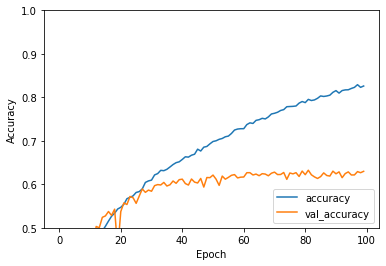

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
from keras.models import load_model

model.save('keras_model.h5')
#kp = load_model('keras_model.h5')
#mas1 = preprocessing(mas)
#prediction = kp.predict(mas1)
#print(prediction)

In [ ]:
import keras
print (keras.__version__)

2.4.3


In [ ]:
import tensorflow as tf
print (tf.__version__)

2.3.0
